<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

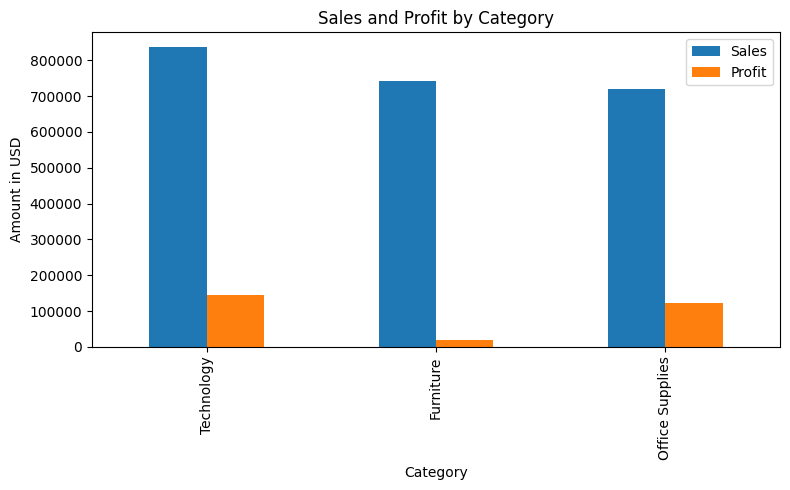

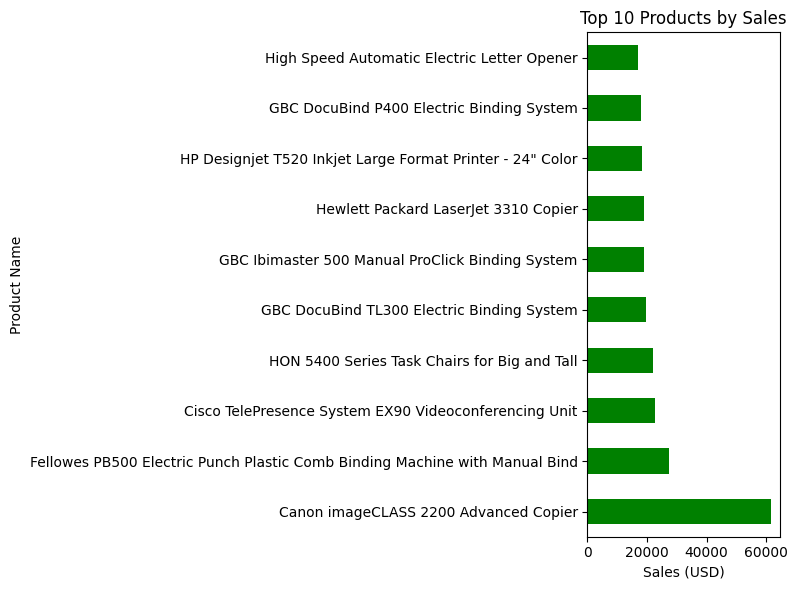

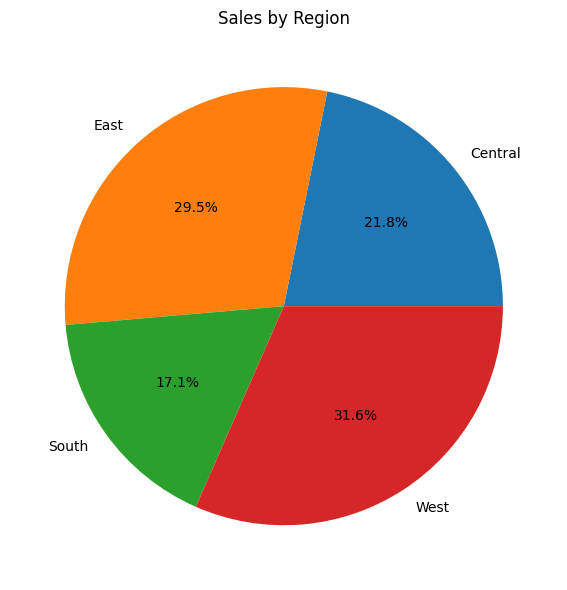

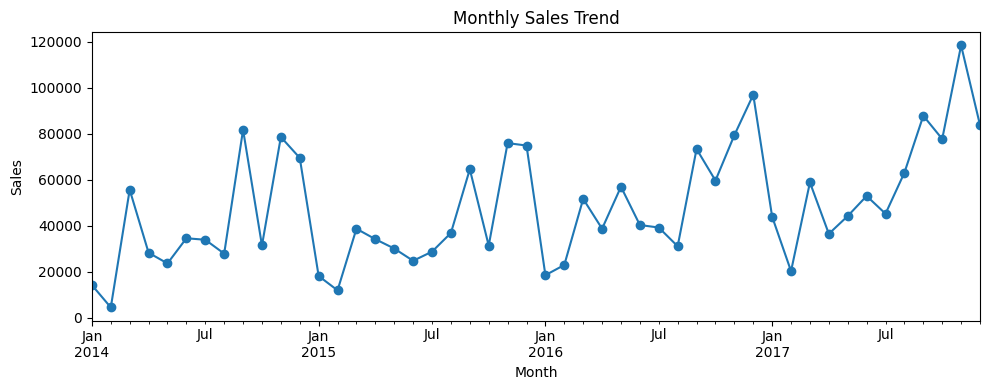

In [3]:
# 📊 Sales Dashboard Analysis
# Author: Ahaan Mandan

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/SampleSuperstore.csv', encoding='ISO-8859-1')
df.head()

# Basic info
df.info()
df.describe()

# 🔍 Total Sales & Profit by Category
category_data = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
category_data.plot(kind='bar', figsize=(8,5), title="Sales and Profit by Category")
plt.ylabel("Amount in USD")
plt.tight_layout()
plt.savefig('../images/sales_profit_by_category.png')
plt.show()

# 📦 Top 10 Products by Sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(8,6), title="Top 10 Products by Sales", color='green')
plt.xlabel("Sales (USD)")
plt.tight_layout()
plt.savefig('../images/top_products.png')
plt.show()

# 🌎 Sales by Region
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Sales by Region')
plt.ylabel('')
plt.tight_layout()
plt.savefig('../images/sales_by_region.png')
plt.show()

# 📈 Monthly Sales Trend
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(10,4), title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.tight_layout()
plt.savefig('../images/monthly_sales_trend.png')
plt.show()
